<a href="https://colab.research.google.com/github/sanket-poojary-03/gesture_detection/blob/main/gesture_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [1]:
!wget -q https://storage.googleapis.com/mediapipe-models/gesture_recognizer/gesture_recognizer/float16/1/gesture_recognizer.task

In [191]:
!pip install -U kora

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.2 MB/s eta 0:00:00


**INPUT VIDEO AND IMAGE**

In [181]:
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 600):

  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

show_video('/content/production_id_4492644 (240p).mp4')

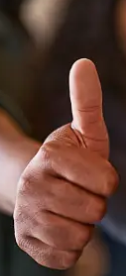

In [202]:
from IPython.display import display, Image
display(Image(filename='/content/thumbs_up.png'))

**AS WE CAN SEE THIS TYPE OF GESTURE IS NOT PRESENT IN THIS IMAGE**

In [182]:

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

#Create an GestureRecognizer object.
base_options = python.BaseOptions(model_asset_path='gesture_recognizer.task')
options = vision.GestureRecognizerOptions(base_options=base_options)
recognizer = vision.GestureRecognizer.create_from_options(options)
def predict_label_image(image_file_name):
  images = []
  results = []
  image = mp.Image.create_from_file(image_file_name)
  recognition_result = recognizer.recognize(image)

  images.append(image)
  top_gesture = recognition_result.gestures[0][0]
  results.append(top_gesture)
  return results[0].category_name


In [197]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np

def gesture_recognition(video_path):
    base_options = python.BaseOptions(model_asset_path='gesture_recognizer.task')
    options = vision.GestureRecognizerOptions(base_options=base_options)
    recognizer = vision.GestureRecognizer.create_from_options(options)

    results = []

    def predict_label_image(frame):
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=np.asarray(frame))

        recognition_result = recognizer.recognize(mp_image)
        top_gesture = recognition_result.gestures
        results.append(top_gesture)
        return results

    cap = cv2.VideoCapture(video_path)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Send each frame to the function for gesture recognition
        result = predict_label_image(frame)

    cap.release()
    cv2.destroyAllWindows()
    return result


In [212]:

def check(img,video):
    target= predict_label_image(img)
    res=gesture_recognition(video)
    cap = cv2.VideoCapture(video)
    out = cv2.VideoWriter('output1.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 30, (int(cap.get(3)),int(cap.get(4))))
    i=0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if res[i]==[]:
          out.write(frame)
        else:
         if res[i][0][0].category_name== target:
           cv2.putText(frame, 'Gesture Detected', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
           out.write(frame)
         else:
           out.write(frame)
        i=i+1
    cap.release()
    out.release()
    cv2.destroyAllWindows()



**PASS THE GESTURE IMAGE AND VIDEO AS INPUT**

In [213]:
check(img='/content/thumbs_up.png',video='/content/production_id_4492644 (240p).mp4')

**THE OUTPUT VIDEO IS :**

**NOW WE CHECK WITH OTHER GESTURE INPUT**

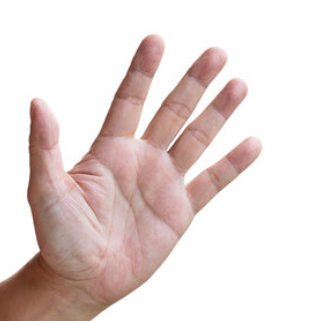

In [208]:
from IPython.display import display, Image
display(Image(filename='/content/hi.png'))

In [214]:
check(img='/content/hi.png',video='/content/production_id_4492644 (240p).mp4')